In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base()

In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [18]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most recent date in the dataset: {most_recent_date}")

Most recent date in the dataset: 2017-08-23


In [27]:
most_recent_date_dt = datetime.strptime(most_recent_date, '%Y-%m-%d')


In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
results = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).all()
# Calculate the date one year from the last date in data set.
one_year_before = most_recent_date_dt - timedelta(days=365)
print(f"Date one year before the most recent date: {one_year_before.date()}")

Date one year before the most recent date: 2016-08-23


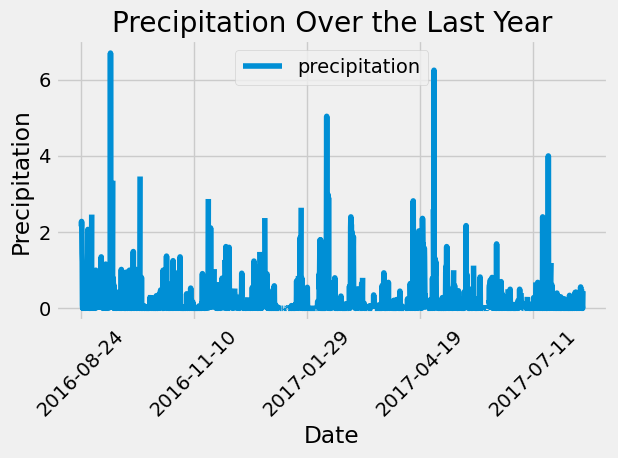

In [30]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('date', inplace=True)
df.plot(rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over the Last Year')
plt.tight_layout()
plt.show()

In [31]:
summary_stats = df['precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# Convert to a DataFrame for better visualization
active_stations_df = pd.DataFrame(active_stations, columns=['station', 'count'])
print(active_stations_df)

       station  count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511


In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations_df.iloc[0]['station']
# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
temp_stats_df = pd.DataFrame(temp_stats, columns=['min_temp', 'max_temp', 'avg_temp'])
print(temp_stats_df)

   min_temp  max_temp   avg_temp
0      54.0      85.0  71.663781


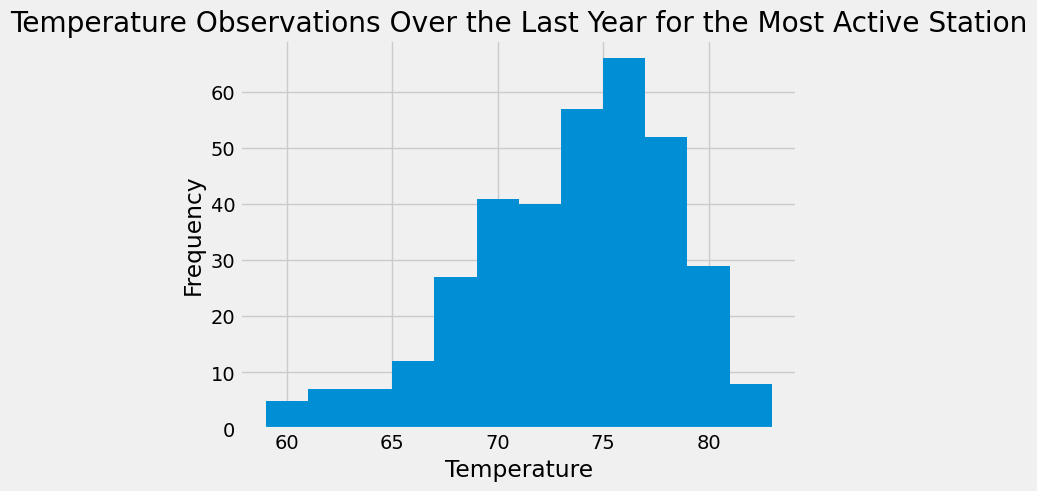

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
most_recent_date_dt = datetime.strptime(most_recent_date_str, '%Y-%m-%d')
one_year_before = most_recent_date_dt - timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temp_observations = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station_id).filter(Measurement.date >= one_year_before).all()

# Convert to a DataFrame
temp_observations_df = pd.DataFrame(temp_observations, columns=['date', 'temperature'])

# Plot the results as a histogram
temp_observations_df['temperature'].plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations Over the Last Year for the Most Active Station')
plt.show()

# Close Session

In [42]:
# Close Session
session.close()